<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters with the Iris Dataset

---

Below you will practice using K-Means clustering and the various evaluation strategies we covered on the famous Iris dataset.

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-format-the-data" data-toc-modified-id="Import-and-format-the-data-1">Import and format the data</a></span></li><li><span><a href="#Plot-the-data-to-visually-estimate-the-correct-number-of-clusters" data-toc-modified-id="Plot-the-data-to-visually-estimate-the-correct-number-of-clusters-2">Plot the data to visually estimate the correct number of clusters</a></span></li><li><span><a href="#Rescale-the-data-if-necessary" data-toc-modified-id="Rescale-the-data-if-necessary-3">Rescale the data if necessary</a></span></li><li><span><a href="#Cluster-the-data-using-K-Means" data-toc-modified-id="Cluster-the-data-using-K-Means-4">Cluster the data using K-Means</a></span></li><li><span><a href="#Check-the-centroids-and-plot-them-along-two-of-the-features" data-toc-modified-id="Check-the-centroids-and-plot-them-along-two-of-the-features-5">Check the centroids and plot them along two of the features</a></span></li><li><span><a href="#Compute-the-silhouette-score-for-your-clusters" data-toc-modified-id="Compute-the-silhouette-score-for-your-clusters-6">Compute the silhouette score for your clusters</a></span></li><li><span><a href="#Plot-the-silhouette-score-for-K-=-2,3,4,5,6,7,8" data-toc-modified-id="Plot-the-silhouette-score-for-K-=-2,3,4,5,6,7,8-7">Plot the silhouette score for K = 2,3,4,5,6,7,8</a></span></li><li><span><a href="#Plot-the-inertia-score-for-the-different-K-clusters" data-toc-modified-id="Plot-the-inertia-score-for-the-different-K-clusters-8">Plot the inertia score for the different K clusters</a></span></li><li><span><a href="#Fit-K-Means-with-3-clusters-and-pull-out-the-cluster-labels.-Pull-out-the-true-labels-as-well." data-toc-modified-id="Fit-K-Means-with-3-clusters-and-pull-out-the-cluster-labels.-Pull-out-the-true-labels-as-well.-9">Fit K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.</a></span></li><li><span><a href="#Calculate-the-completeness,-homogeneity-and-V-measure-scores-comparing-cluster-and-true-labels" data-toc-modified-id="Calculate-the-completeness,-homogeneity-and-V-measure-scores-comparing-cluster-and-true-labels-10">Calculate the completeness, homogeneity and V measure scores comparing cluster and true labels</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [43]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, homogeneity_completeness_v_measure, v_measure_score
from sklearn.preprocessing import StandardScaler
from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette

### Import and format the data


- Use `sklearn.datasets.load_iris()`

In [4]:
data = load_iris()

In [7]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Plot the data to visually estimate the correct number of clusters

In [19]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)

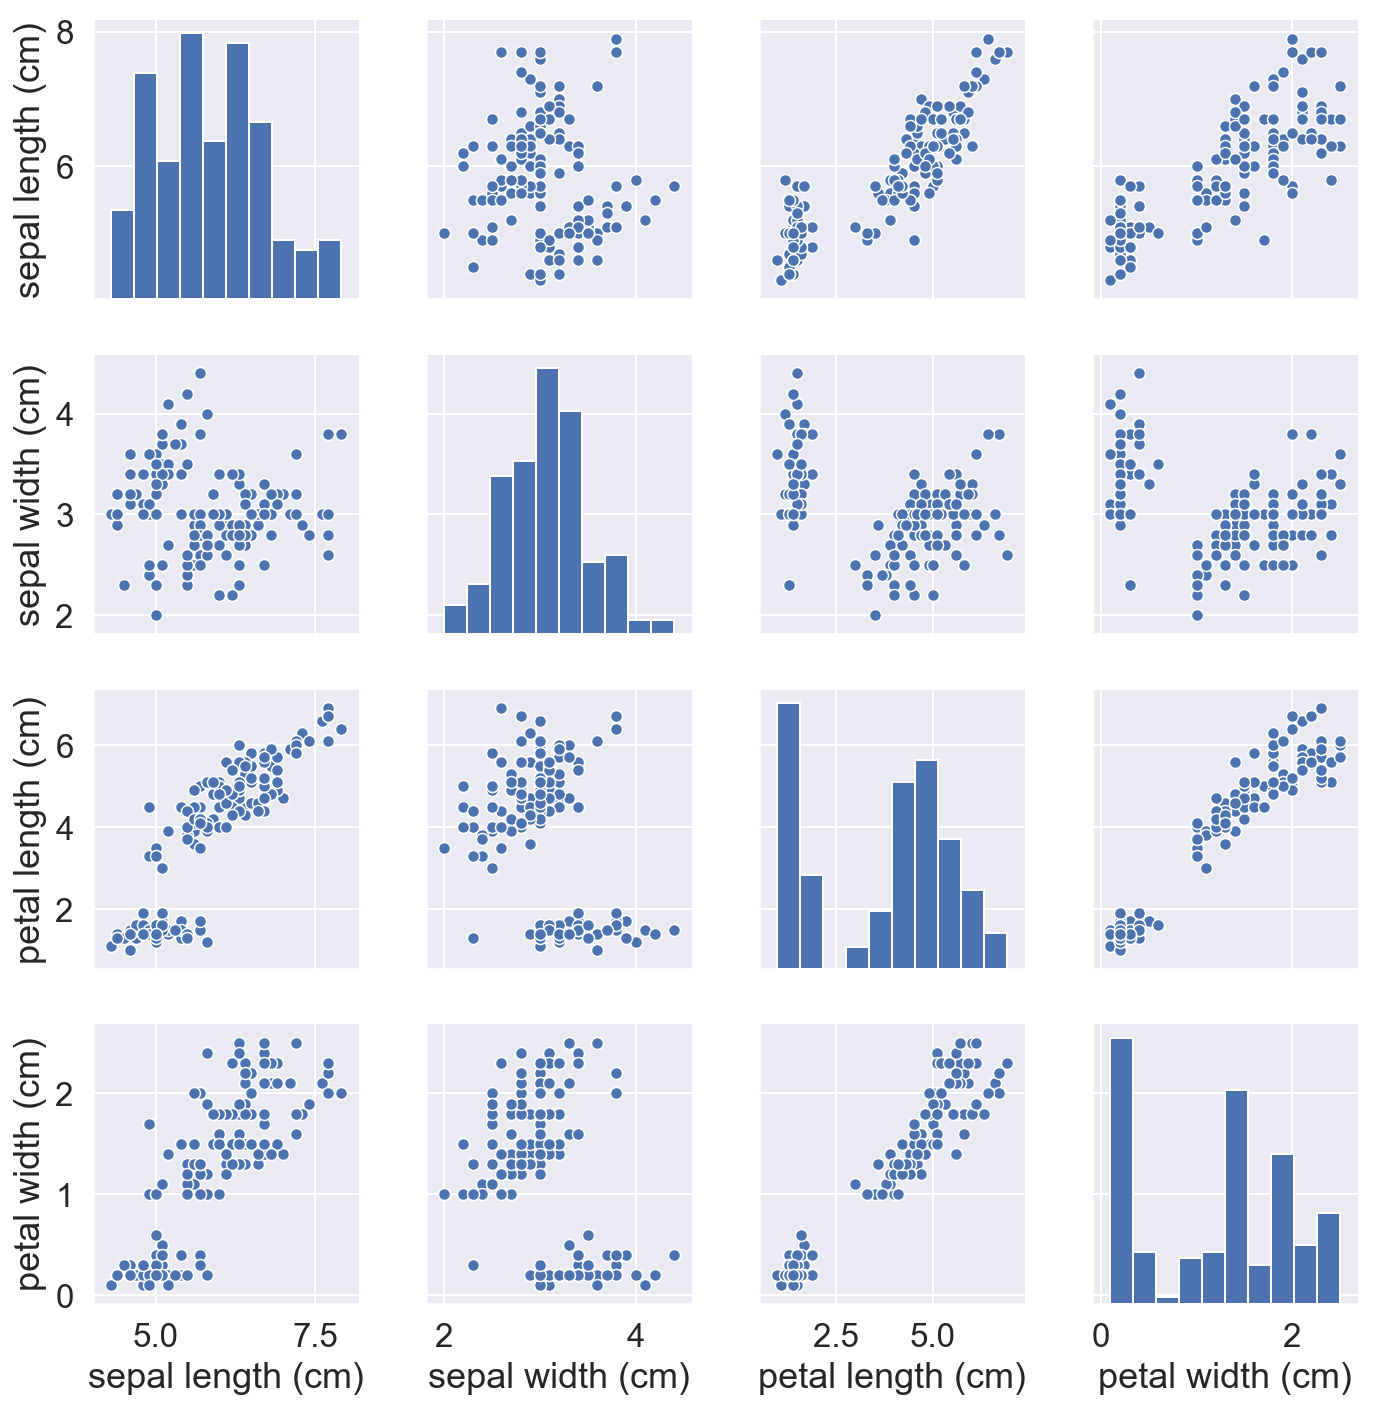

In [20]:
sns.pairplot(X)

### Rescale the data if necessary

In [35]:
scaler = StandardScaler()
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Cluster the data using K-Means

- Select a number of clusters of your choice based on your visual analysis above.
- Compute the labels and centroids.

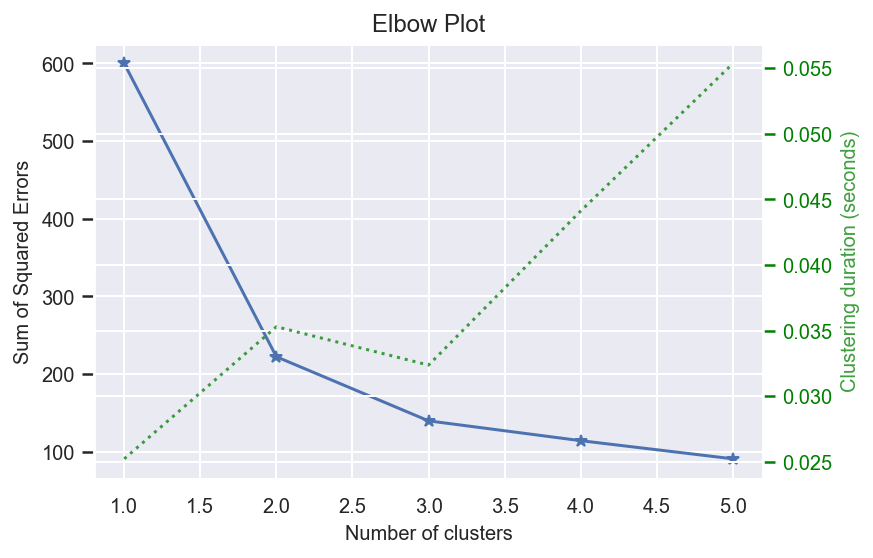

In [26]:
model = KMeans(2)
plot_elbow_curve(model, Xs, cluster_ranges=range(1,6))

### Check the centroids and plot them along two of the features

How did your clustering perform?

Bonus: Color according to cluster labels and choose different symbols for each true class label.

In [36]:
model.fit(Xs)
model.cluster_centers_

array([[ 0.50728948, -0.42663134,  0.65249366,  0.62744675],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

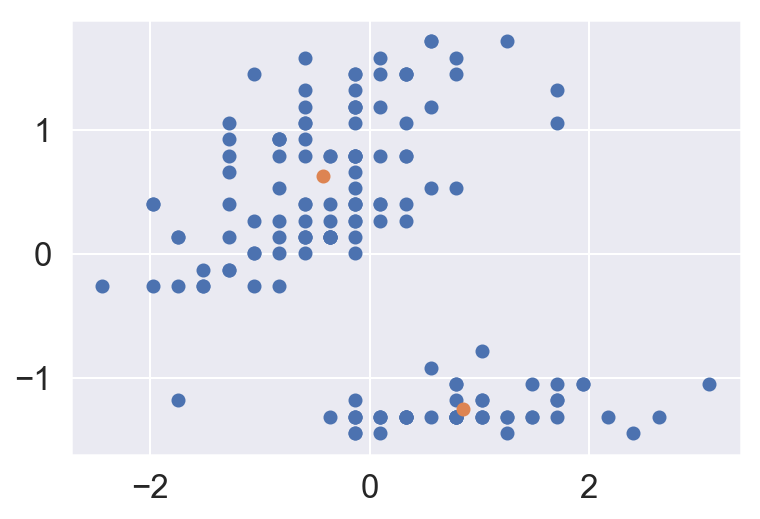

In [37]:
plt.scatter(Xs['sepal width (cm)'], Xs['petal width (cm)'],cmap='prism')
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,3])

### Compute the silhouette score for your clusters

What does the score indicate?

In [40]:
silhouette_score(Xs, model.labels_)
# the score is above 0, therefore the datapoints within a cluster are closer to each other than to datapoints in 
# other clusters. On average this is a 40% ratio of their own cluster vs the next cluster

0.5817500491982808

### Plot the silhouette score for K = 2,3,4,5,6,7,8

You will need to fit a new model for each one. You can standardize your data before iterating through the clusters or not, up to you.

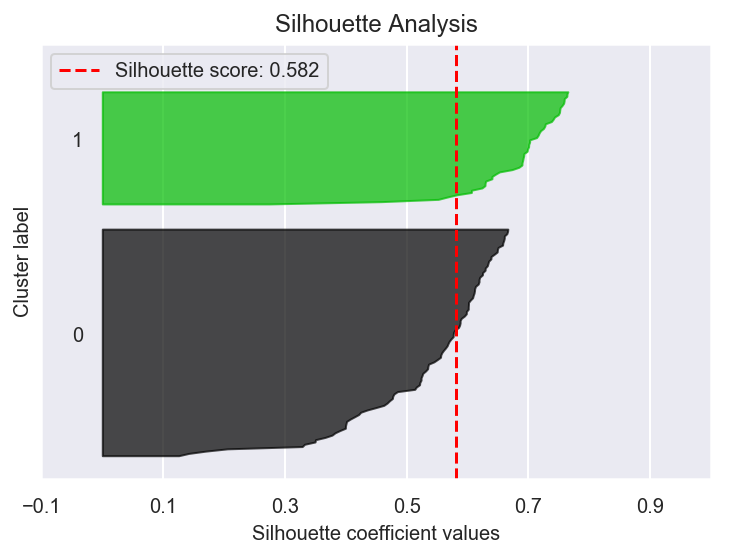

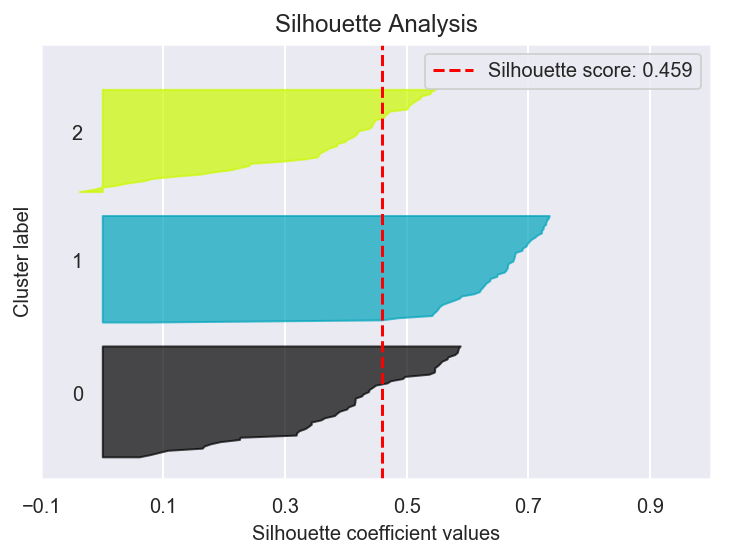

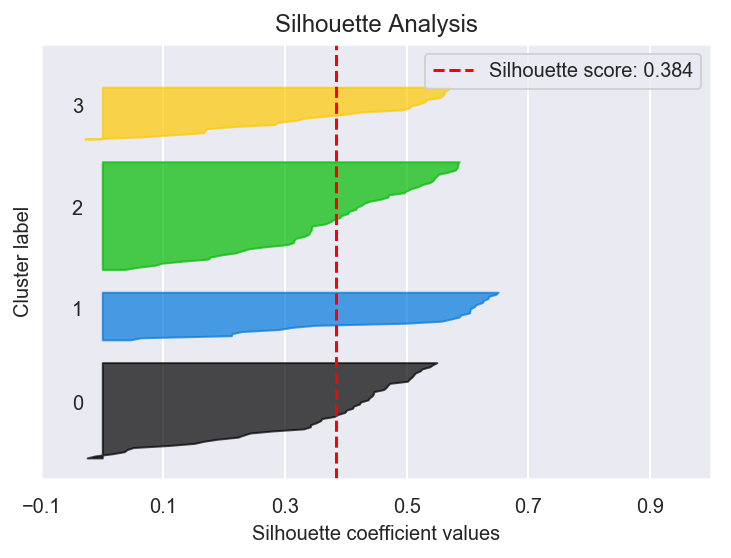

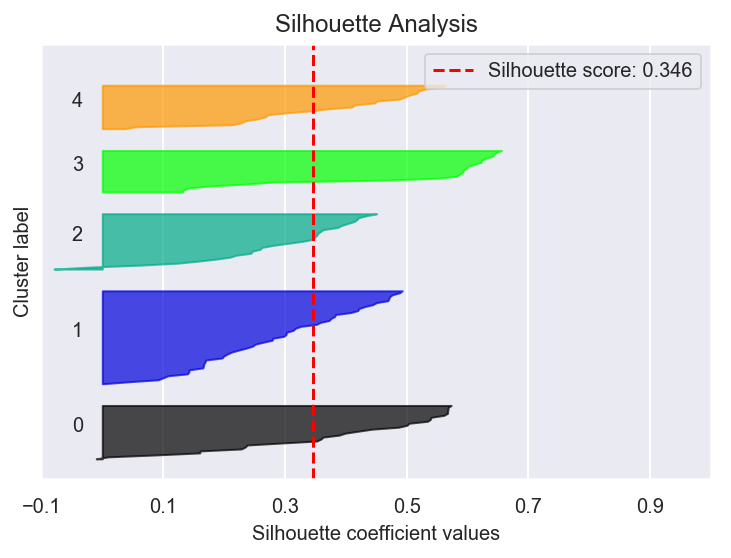

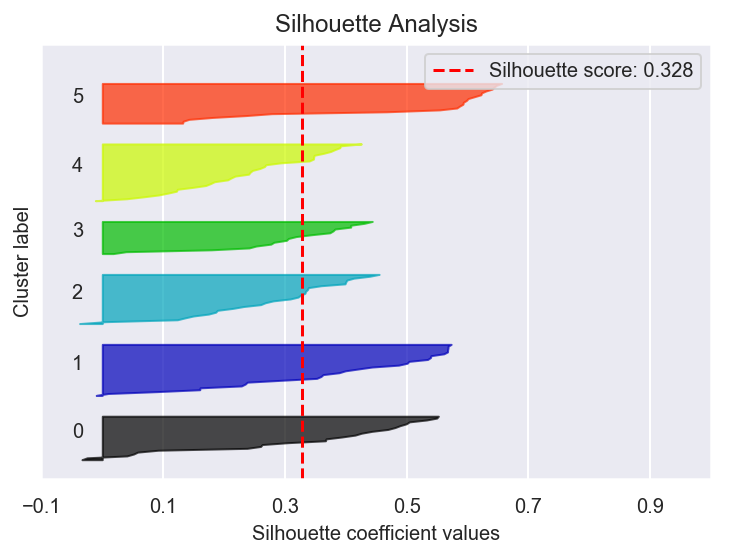

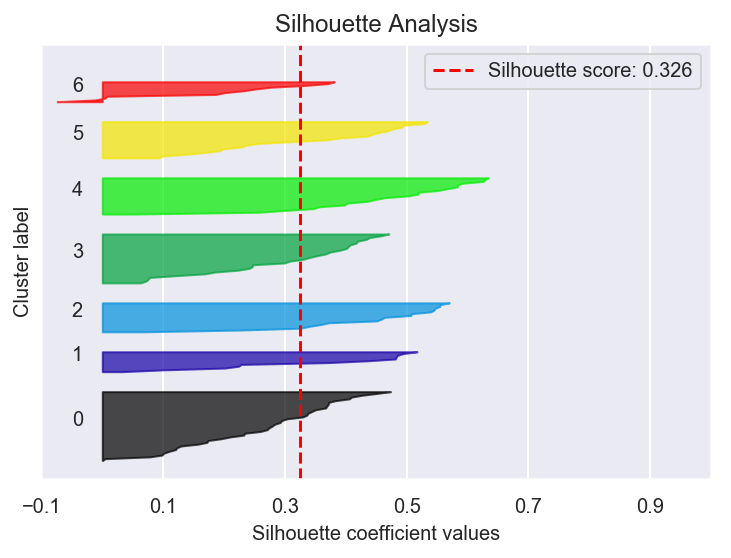

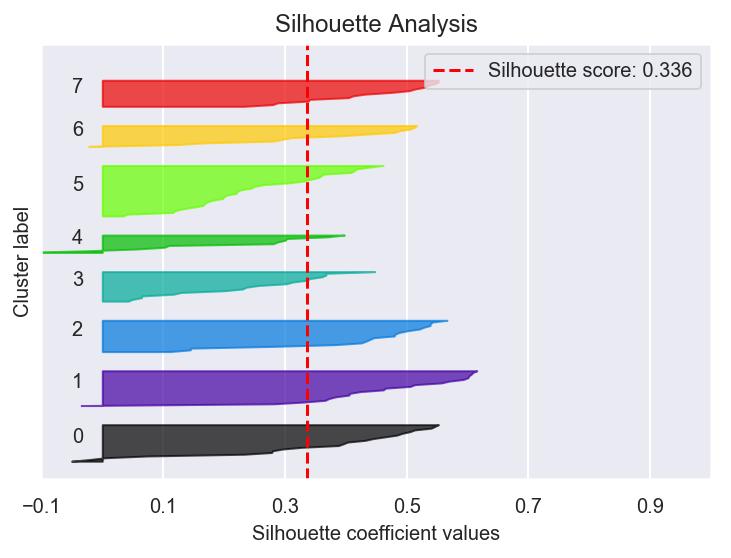

In [46]:
for i in range(2,9):
    model = KMeans(i)
    model.fit(Xs)
    plot_silhouette(Xs, model.labels_)

### Plot the inertia score for the different K clusters

Is there an "elbow" to select a good number of clusters or not?

Bonus: Do this by hand.

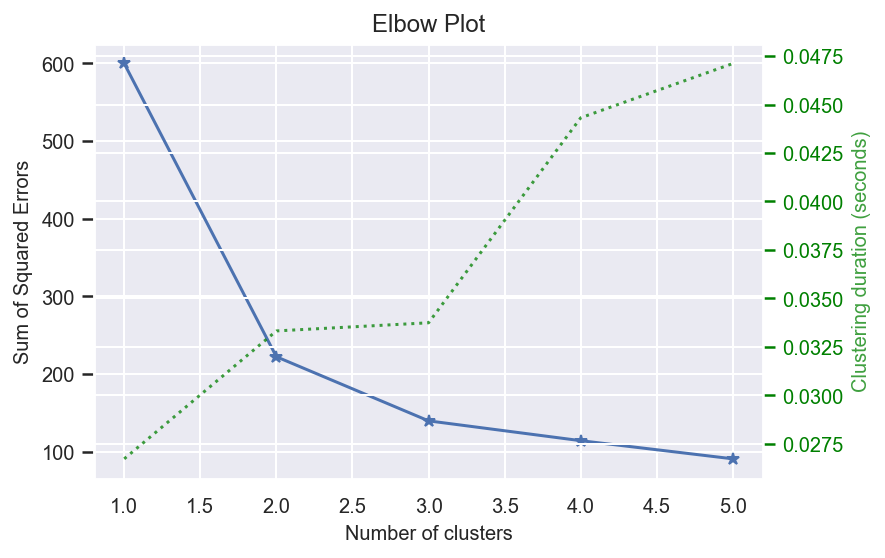

In [47]:
plot_elbow_curve(model, Xs, cluster_ranges=range(1,6))

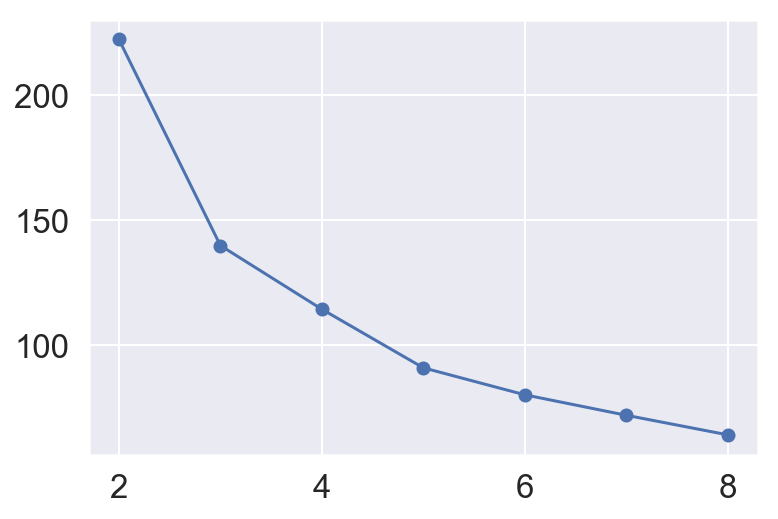

In [52]:
# Bonus:
cluster = []
inertia = []
for i in range(2,9):
    model = KMeans(i)
    model.fit(Xs)
    cluster.append(i)
    inertia.append(model.inertia_)
    
plt.plot(cluster,inertia,'bo-')

### Fit K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster 0 should correspond roughly to species 0, cluster 1 to species 1, and cluster 2 to species 2.

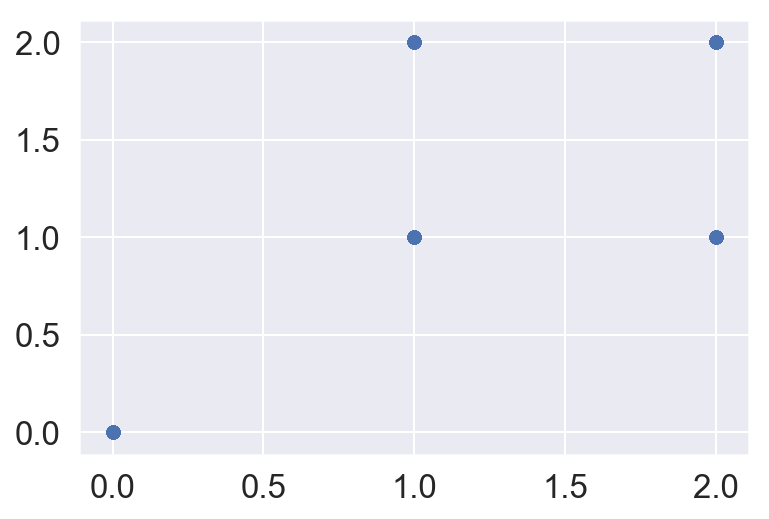

In [53]:
model = KMeans(3)
model.fit(Xs)
plt.scatter(model.labels_,data.target)

### Calculate the completeness, homogeneity and V measure scores comparing cluster and true labels

In [54]:
homogeneity_completeness_v_measure(data.target,model.labels_)

(0.659126501804901, 0.659847677962776, 0.659486892724918)

In [55]:
homogeneity_completeness_v_measure(model.labels_,model.labels_)

(1.0, 1.0, 1.0)